### Common Mistakes in Project 1

Importing packages with non-standard aliases

In [ ]:
import seaborn as sns
import scipy as sc                    ### What you're doing here is importing the scipy module under the alias 'sc', so
import numpy as np                    ### you can call the module without typing out 'scipy' in its entirety. I've never
import matplotlib.pyplot as plt       ### seen someone use 'sc' as an alias for scipy, most examples use 'sp'.
import random as ran
import pandas as pd

pd.options.display.max_columns=1000   ### Please don't try to display all columns

#Imports: Imports all my libraries used

Errors in path names

In [ ]:
df_sat2017 = pd.read_csv("./data/sat_2017.csv") ### These didn't run out of the box because of the way you arranged folders.
df_act2017 = pd.read_csv("./data/act_2017.csv") ### Since data is in the same directory as the the notebook, the path name 
                                                ### is ./data/sat_2017.csv (current directory) instead of ../ which refers
                                                ### to the parent directory. (try cd ../ in command prompt)

Printing entire DataFrame

In [ ]:
df_sat2017                                      ### Try not to do this if possible - doesn't work well with larger datasets

Numpy transpose function

In [ ]:
np.transpose(df_sat2017 .describe())            ### or just final.describe().T

Run-on lines

In [ ]:
#code
sat_2017.rename(columns={'State':'state','Participation':'2017_sat_participation','Evidence-Based Reading and Writing':'2017_sat_evidence-based_reading_and_writing','Math':'2017_sat_math','Total':'2017_sat_total'},inplace=True)
act_2017.rename(columns={'State':'state','Participation':'2017_act_participation','English':'2017_act_english','Math':'2017_act_math','Reading':'2017_act_reading','Science':'2017_act_science','Composite':'2017_act_composite'},inplace=True)

In [ ]:
### You can split dictionaries across multiple lines to improve readability
###
### sat_2017.rename(columns={'State':'state','Participation':'2017_sat_participation',
###                         'Evidence-Based Reading and Writing':'2017_sat_evidence-based_reading_and_writing',
###                         'Math':'2017_sat_math','Total':'2017_sat_total'},inplace=True)

Filtering DataFrame for (known) individual values

In [ ]:
df_act2017[df_act2017["State"] == "Maryland"] ### This is correct, but inefficient. This creates an entirely
                                              ### new list, then checks all values of the list for the == condition.
                                              ### You're better off using df_act2017.loc[21, :] or df_act2017[21:22]
                                              ### or .iat since you already know the index of Maryland. Both are faster.
                                              ### Check using the code below
                                              ### import timeit 
                                              ### %timeit df_act2017[df_act2017["State"] == "Maryland"]
                                              ### then change the statement to the new ones to look at the speedup 

Odd indexing

In [ ]:
def calc_std(my_list):
    diff = []
    sum_1 = sum(my_list)
    n = len(my_list)
    mean = sum_1/n                        ### or just np.mean(my_list)
             
    for i in my_list:                     ### Usually use i,j,k for indices, not elements. 
        difference = i - mean             ### eg for i in range(len(values)), x += ((values[i] - mean)**2) 
        diff.append(difference**2)        ### Something like v for values would be a bit clearer
    
    std_div = ((sum(diff))/n)**0.5        ### Would be faster if you just summed through the for look instead of appending 
    return(std_div)                       ### to a list and summing at the end anyway. Also better for system memory.
#returns SD

Unnecessary Imports

In [ ]:
import math                                     ### Not needed. 
import numpy as np
def std_dev(col):
    sd = 0.0                                    ### Might want to call it something else instead of sd since it's confusing
    col_mean = col.mean()
    for i in range(len(col)):
        sd = sd + (col[i]-col_mean)**2          ### += also works here 
    sd = math.sqrt(sd/len(col))                 ### Not very readable. See first comment
    return sd                                   ### interestingly, math.sqrt runs pretty slowly compared to just 
                                                ### simply exponentiating by 0.5. To test, try
                                                ### import timeit
                                                ### %timeit math.sqrt(100)
                                                ### replace with 100 ** 0.5 to see the difference.

Wrong justification of differences in SD -- it's not due to rounding

In [ ]:
### This os due to the difference in the degrees of freedom used in both methods. The numpy implementation 
### and provided formula use a ddof = 0 approach to calculating the (sample) standard deviation, whereas the 
### pandas impletmentation defaults to ddof = 1.
###
### Practically, this means the the sum of squared deviations Σ (x_i - x_bar)^2 gets divided by N in the first case, and 
### N-1 in the latter case. 
###
### Looking at the sat_participation_2017 for and pandas, we have values of 0.352766 (pandas) and 0.3492907076664507(std).
### We can obtain one from the other by multiplying by the appropriate prefactor.
###
### combined_df.shape            -> (51, 21)                   # N = 51
### 0.352766 * (50/51) ** 0.5    -> 0.3492903881457095         # remember the square root since it's an standard deviation
###
### Rounding errors from floating point calculations don't typically set in so early. 

Confusing variance and squared deviations

In [ ]:
### To be very exact, the squared deviations summa[(y-y_bar)^2] are the dividend and not the variance. 
### The variance is the 'mean' of this object, but depending on the degrees of freedom you
### divide it by N or N-1.
### Taking ddof = 0  results in an underestimation of the variance since you miss the extra degree of freedom

Float equalities

In [ ]:
final.describe().T.loc['sat17_pax','std'] == sample_stdev_formula(final.sat17_pax)

In [ ]:
### In general you shouldn't compare floats like this since floating point errors in the calculation can often
### make this evaluate to False even if the math checks out. 
###
### You'd probably want to check float equality via tolerance levels intead
###
### 1/3 + 1/4 == 7/12                               -> False
### 7/12 * 0.99999 < 1/3 + 1/4 < 7/12 * 1.00001     -> True
### abs(1/3 + 1/4 - 7/12) < 10**-12                 -> True. More elegant.
###
### Rounding errors from floating point calculations won't typically set in so early. 

Useless variables

In [ ]:
def std_dev_np(col):
    sd_np = np.std(col, ddof=1)
    return sd_np                    ### Or just directly return np.std(col, ddof=1) to save time writing and accessing 
                                    ### a variable. But if that were the case, why not just call np.std()?

Blurred Images

In [ ]:
# Box Plot (Participation Rates for SAT and ACT 2017/2018)

ax = plt.subplots(figsize=(15,10))               ### Notice how the image is slightly blurred? 
plt.title('Test Participation',fontsize=28)      ### You can avoid this by forcing the dpi 
plt.ylabel('Participation',fontsize=20)          ### ax = plt.subplots(dpi=160, figsize=(15,10))   
plt.ylim(0, 1.2)

sns.boxplot(data = combined_df[['sat_participation_2017','sat_participation_2018','act_participation_2017','act_participation_2018']],width=0.7)

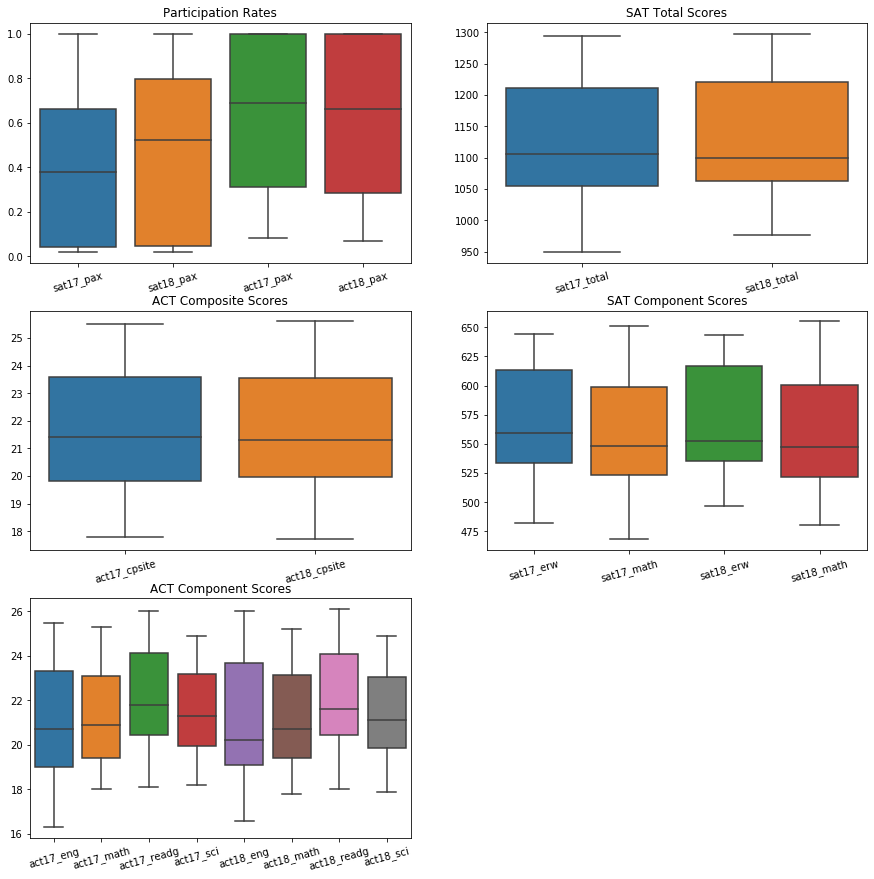

In [92]:
subplot_boxplot(final, collection_, titles_)

Scaling issues

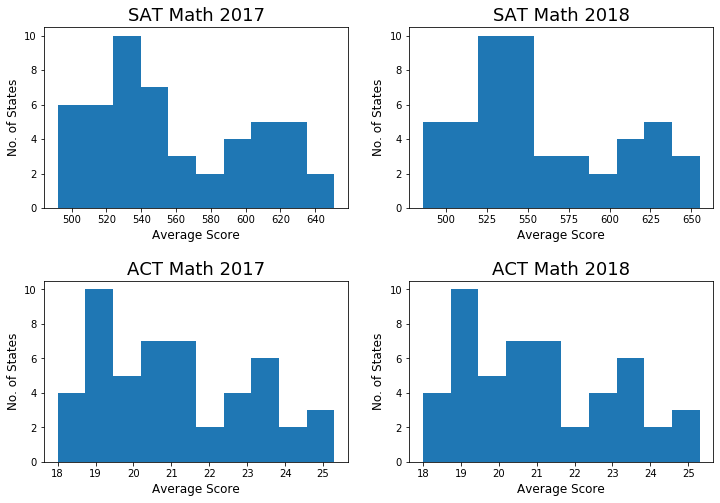

In [86]:
subplot_histograms(final, ["sat_math_2017", "sat_math_2018", "act_math_2017", "act_math_2017"],
                   ["SAT Math 2017", "SAT Math 2018", "ACT Math 2017", "ACT Math 2018"],
                   "Average Score")

In [ ]:
### It's difficult to compare across SAT scores when the two plots don't share the same x-axis scaling.
### Scaling should be consistent for comparison to be meaningful.
### The additional kwarg (keyword argument) that needs to be specified in the function
### should be plt.subplots(..., sharex='row') for it to share the x-axes across subplot rows.

Misleading Graphs

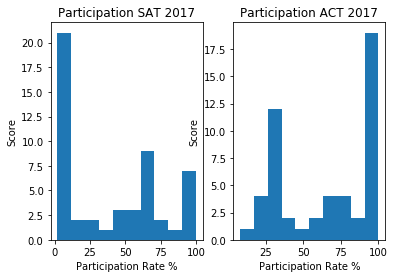

In [125]:
subplot_histograms(combined_2017, ['participationsat17', 'participationact17'],['Participation SAT 2017', 'Participation ACT 2017'], ['Participation Rate %', 'Participation Rate %'])# Code

In [ ]:
### plot is misleading. y-axis labels shouldn't be score if this is a histogram, and should be shared across the subplots.
### x axis also have different scales. It should be should be plt.subplots(..., sharex='row',sharey='row') 
### for it to share the x and y axes across subplot rows. Doing this should also prevent the doubled y-axis labels
### score, score from interfering with the plot.

Manual Scatterplots

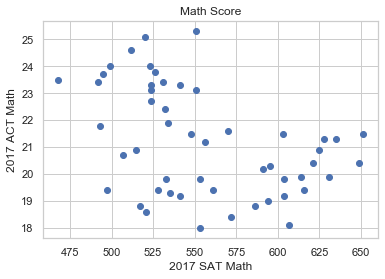

In [108]:
x = ACT_SAT_final['sat_2017_math']   ### You could have written a function to save time
y = ACT_SAT_final['act_2017_math']   ### seaborn 0.90 has a function that pretty much does the same thing.
colors = ['b']                       ### sns.scatterplot(x,y)
plt.scatter(x, y, c=colors, alpha=1)
plt.title('Math Score')
plt.xlabel('2017 SAT Math')
plt.ylabel('2017 ACT Math')
plt.show()

Visual guides for scatterplots

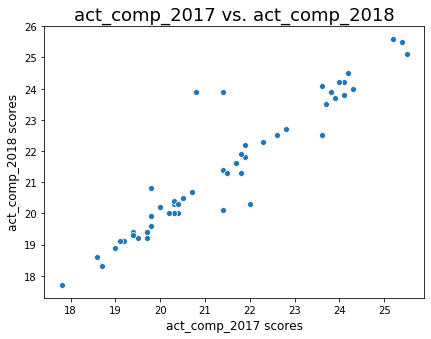

In [90]:
scatter(final,["act_comp_2017"], ["act_comp_2018"])

In [ ]:
### Correct, but drawing a act_comp_2018 = act_comp_201 y=x line and annotating the outliers would help with 
### the visualisation. States in the region above would have act_comp_2018 > act_comp_2017. Annotation can be
### done using matplotlib.pyplot.annotate (see documentation).

Unscaled Boxplots

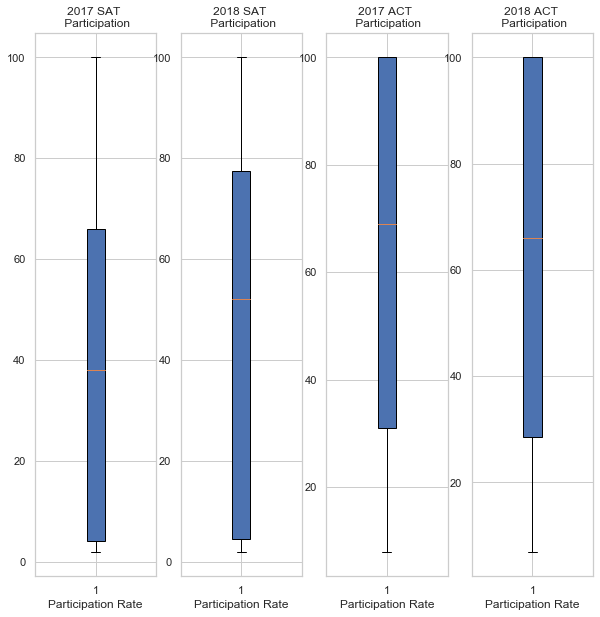

In [114]:
list_of_xlabels = ['Participation Rate', 'Participation Rate', 'Participation Rate', 'Participation Rate']
list_of_columns = ['sat_2017_participation', 'sat_2018_participation','act_2017_participation','act_2018_participation']
list_of_titles = ['2017 SAT \n Participation', '2018 SAT \n Participation', '2017 ACT \n Participation', '2018 ACT \n Participation' ]
box_plot(ACT_SAT_final, list_of_columns, list_of_titles, list_of_xlabels)

In [ ]:
### The box plots here should all share the same axis, since they have the same range from zero to one. Sharing 
### a common axis also alleviates the problem where the axis ticks keep appearing between the subplots and the 
### multiple X-axis labels. Also neceessary to remove the '1' above Participation Rate

Plotting Everything

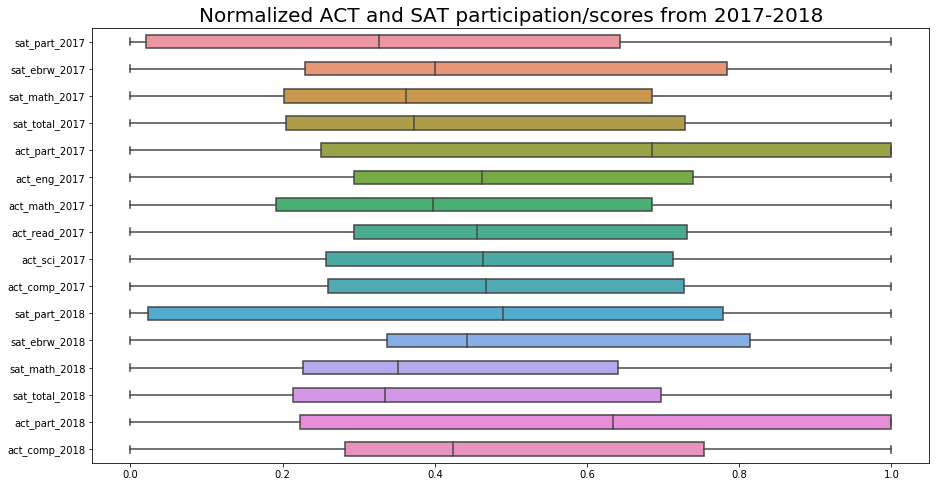

In [103]:
fig, ax = plt.subplots(figsize=(15,8))

# Normalizing the dataset using each column[x] min-max
normalized = pd.DataFrame([(final[x]-final[x].min())/ (final[x].max()-final[x].min()) for x in final]).T

sns.boxplot(data=normalized, width = 0.5, orient = "h")
plt.title("Normalized ACT and SAT participation/scores from 2017-2018",fontsize=20);

In [ ]:
### Very pretty, but not sure how useful this will be. Participation should definitely be removed -- they obey
### a completely different metric. Otherwise splitting the data further into year/test might be a better idea
### to reduce clutter. Normalisation also brings some pretty unexpected results: it looks like the mean of 
### sat_total_2018 is lower than both sat_ebrw_2018 and sat_math_2018. An explaination could probably be put
### into captions but it'll be better if it were more obvious from the graphic.

Cluttered Graphics

Text(0, 0.5, 'Participation Rate Change')

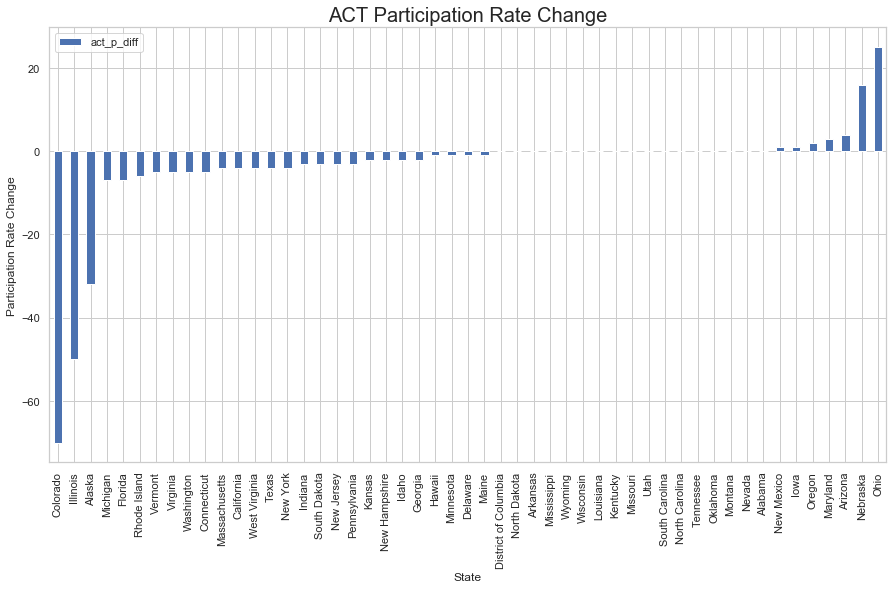

In [123]:
#Understand how participation rates change for ACT, per state.
#ACT_SAT_final['act_p_diff'] = ACT_SAT_final['act_2018_participation'].sub(ACT_SAT_final['act_2017_participation'], axis = 0)
ACT_SAT_final['act_p_diff'] = ACT_SAT_final['act_2018_participation']-ACT_SAT_final['act_2017_participation']
ACT_SAT_final.sort_values('act_p_diff', ascending=True, inplace=True)
ACT_SAT_final.plot(x='state', y='act_p_diff', kind='bar', figsize=(15,8))
plt.title('ACT Participation Rate Change', size=20)
plt.xlabel('State')
plt.ylabel('Participation Rate Change')

In [ ]:
### Please don't produce visualisations like these. Select the things you want to highlight and discard the rest,
### otherwise the plot becomes extremely cluttered. Maybe Min/Max/Median/Mean + 2/3 states of interest.
### You definitely don't want to plot everything here.

Ugly Histograms

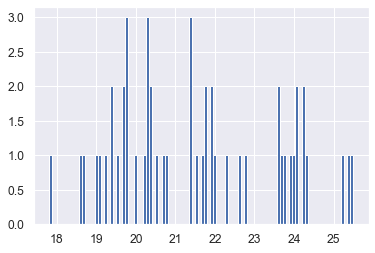

In [78]:
# Distribution for ACT 2017 Composite Scores

combined_df.act_composite_2017.hist(bins=100)        ### Histogram binning should not generally not be manually set,
plt.show()                                           ### appropriate bin size usually derived from freedman-diaconis rule

Inefficient control flow

In [ ]:
# Calculating the normality of our SAT/ACT data using the Shapiro-Wilk test

normal = []
pval = []

for x in final:
    stat, p_value = stats.shapiro(final[x])  ### Good
                                             ### you can pval.append(p_value) here since it's appended in either case
    if p_value < 0.05:        
        normal.append("No")
        pval.append(p_value)
    else:
        normal.append("Yes")
        pval.append(p_value)

Questionable Features

In [ ]:
### I'm a bit worried about defining this USP metric. It seems quite arbitrary and should be much more
### rigerously justified before using it to measure anything.

Wonky Methodology

In [ ]:
# Compare 2018 SAT and 2017 ACT Participation rates.
# Two sample t-test 

# H0 (null hypothesis):         μ_SAT_18 = μ_ACT_18   
# HA:(alternative hypothesis):  μ_SAT_18 ≠ μ_ACT_18

stats.ttest_ind(ACT_SAT_final['sat_2018_participation'], ACT_SAT_final['act_2018_participation'])

# p is 0.016, alpha is 0.05
# As p < alpha, we reject the null hypothesis and conclude the alternative hypothesis to be true.

In [ ]:
### You can certainly perform the t-test, but I'm not sure if H0: μ_SAT_18 = μ_ACT_18 is a good null hypothesis. 
### There doesn't seem to be a compelling reason why we should assume that they were equal in the first place.
### If anything, they are complementary.